In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

%store -r df_prod
%store -r df_geo

Let's merge dataframes with geological and wells production data and inspect it.

In [2]:
df = pd.merge(df_geo, df_prod, on='wellName', how='outer')

In [3]:
df

,Id,wellId,derivedFrom,fileId,wellName,lenF,effLenF,sandF,shalySandF,calciteF,coalF,permF,KL,KLsand,KLshalySand,linVolArch,linVolCap,RHOB,well_comp,well_PI_5
0,15.0,22.0,Las,11.0,3,1902.9,989.6,115.1,874.5,6.7,0.0,452.7,447995.4,358997.7,88997.7,88.2,112.7,51.2,AICD,5.681821
1,16.0,53.0,Las,12.0,5,1998.9,1113.2,266.5,846.7,46.8,16.9,1169.3,1301719.1,1177299.2,124420.0,136.5,165.5,227.6,AICV,3.870200
2,17.0,69.0,Las,13.0,11026,2327.4,1014.4,381.7,632.7,32.0,0.0,1615.8,1639041.2,1450631.3,188409.8,139.4,176.7,284.5,SAS,5.711985
3,18.0,70.0,Las,76.0,11024,1261.5,642.9,229.1,413.8,0.0,0.0,939.1,603748.6,539092.0,64656.6,92.5,93.4,49.1,SAS,3.875192
4,19.0,81.0,Las,68.0,11028,2026.8,850.2,284.1,566.1,5.1,0.0,1515.3,1288282.8,1127223.6,161059.2,142.9,143.6,136.7,SAS,2.751723
5,20.0,60.0,Las,16.0,11036,2103.9,1227.4,269.4,958.0,45.0,0.0,884.7,1085932.8,856059.6,229873.3,195.6,176.6,116.7,AICV,6.343946
6,65.0,17.0,Las,78.0,11032,1650.0,1321.4,726.0,595.4,84.7,0.0,2459.8,3250319.4,3017098.6,233220.8,282.2,278.2,521.2,AICV,12.376267
7,66.0,45.0,Las,52.0,11033,1875.8,1439.4,529.8,909.6,42.2,0.0,1243.5,1789837.1,1499784.4,290052.7,295.5,239.9,208.9,SSD ICD,7.146338
8,67.0,46.0,Las,53.0,11034,1861.1,1527.7,569.6,958.1,104.7,2.0,1401.2,2140641.1,1773608.0,367033.1,284.4,262.8,238.5,AICV,10.386915
9,68.0,47.0,Las,54.0,11035,1381.6,929.2,377.6,551.6,7.7,0.0,1690.1,1570439.2,1295123.9,275315.3,199.6,177.5,222.1,SSD ICD,4.955056


A lot of columns don't carry out a piece of useful information hence we can just get rid of them. In addition, 57, 58, 59 rows are consisting mostly of nan values and we are going to just delete them.

In [4]:
df = df.drop([58,59,57], axis = 0)
df= df.drop(['derivedFrom', 'Id', 'wellId', 'fileId'], axis = 1)

For further analysis, we also need to prepare categorical variables.

In [5]:
df = df.replace({'SAS':int(0), 'SSD ICD': int(1), 'AICD': int(2), 'AICV':int(3)})

In [6]:
#descriptive statistics summary

PI_5 = 'well_PI_5'
df[PI_5].describe()

count    57.000000
mean      6.211620
std       3.541010
min       0.585048
25%       3.870200
50%       5.681821
75%       7.872661
max      17.074105
Name: well_PI_5, dtype: float64

<AxesSubplot:xlabel='well_PI_5', ylabel='Density'>

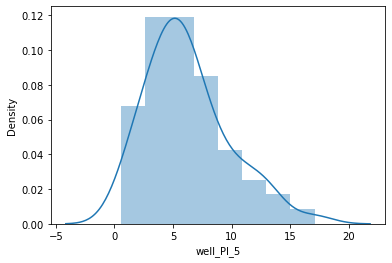

In [7]:
#histogram
sns.distplot(df[PI_5])

According to the histogram of the 'well_PI_5':

- A small deviation from a normal distribution
- Positively skewed distribution 
- There is no peakedness

In [8]:
print("Skewness: %f" % df[PI_5].skew())
print("Kurtosis: %f" % df[PI_5].kurt())

Skewness: 0.852067
Kurtosis: 0.615344


Skewness is not so high that it was expected.

**Relationship with numerical variables:**

<AxesSubplot:xlabel='sandF', ylabel='well_PI_5'>

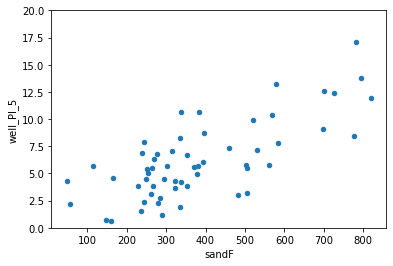

In [9]:
#scatter plot sandF/PI_5
var = 'sandF'
data = pd.concat([df[PI_5], df[var]], axis = 1)
data.plot.scatter(x=var, y = PI_5, ylim = (0, 20))

<AxesSubplot:xlabel='RHOB', ylabel='well_PI_5'>

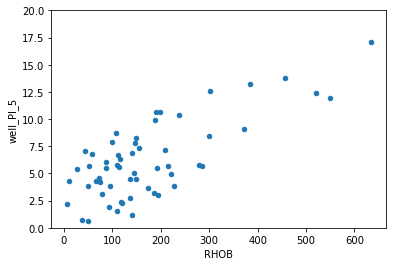

In [10]:
#scatter plot RHOB/PI_5
var = 'RHOB'
data = pd.concat([df[PI_5], df[var]], axis = 1)
data.plot.scatter(x=var, y = PI_5, ylim = (0, 20))

<AxesSubplot:xlabel='KL', ylabel='well_PI_5'>

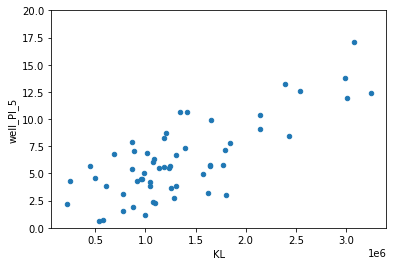

In [11]:
#scatter plot KL/PI_5
var = 'KL'
data = pd.concat([df[PI_5], df[var]], axis = 1)
data.plot.scatter(x=var, y = PI_5, ylim = (0, 20))

<AxesSubplot:xlabel='KLsand', ylabel='well_PI_5'>

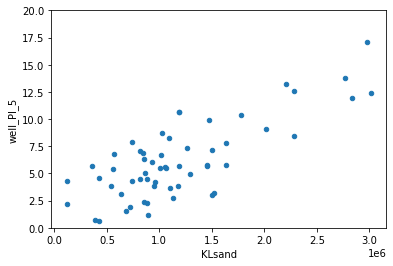

In [12]:
#scatter plot KLsand/PI_5
var = 'KLsand'
data = pd.concat([df[PI_5], df[var]], axis = 1)
data.plot.scatter(x=var, y = PI_5, ylim = (0, 20))

<AxesSubplot:xlabel='shalySandF', ylabel='well_PI_5'>

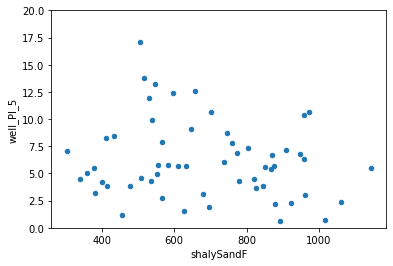

In [13]:
#scatter plot shalySandF/PI_5
var = 'shalySandF'
data = pd.concat([df[PI_5], df[var]], axis = 1)
data.plot.scatter(x=var, y = PI_5, ylim = (0, 20))

<AxesSubplot:xlabel='effLenF', ylabel='well_PI_5'>

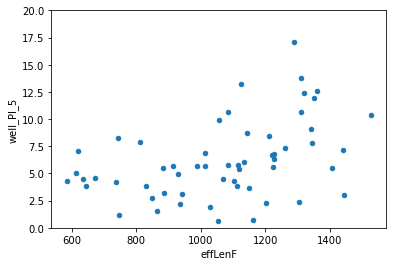

In [14]:
#scatter plot effLenF/PI_5
var = 'effLenF'
data = pd.concat([df[PI_5], df[var]], axis = 1)
data.plot.scatter(x=var, y = PI_5, ylim = (0, 20))

<AxesSubplot:xlabel='linVolArch', ylabel='well_PI_5'>

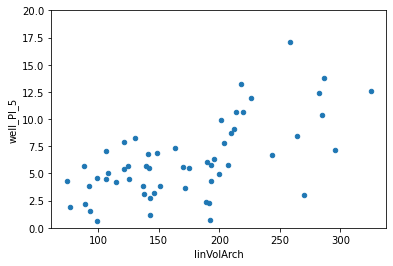

In [15]:
#scatter plot linVolArch/PI_5
var = 'linVolArch'
data = pd.concat([df[PI_5], df[var]], axis = 1)
data.plot.scatter(x=var, y = PI_5, ylim = (0, 20))

It seems that 'sandF', 'RHOB' (the measure of clean sand in well) have a **linear relationship** with 'well_PI_5'. However 'sandF' and 'RHOB' have one source for calculation hence.

'KL' and 'KLsand' also have a **linear relationship** with 'PI_5'.

'shalySandF', 'linVolArch' and 'effLenF' don't have good linear relationship with 'well_PI_5' (although 'linVolArch' seems to be kind of exponential).

**Relationship with categorical features:**

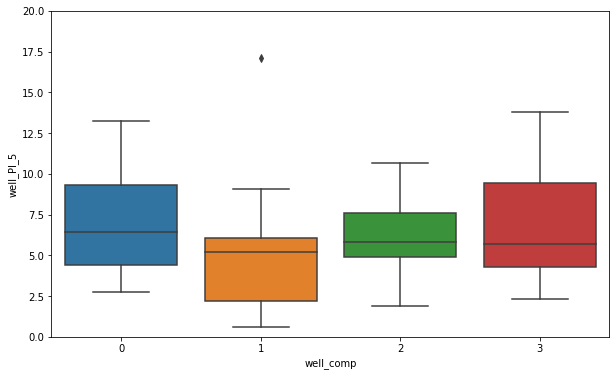

In [16]:
#box plot well_comp/PI_5
var = 'well_comp'
data = pd.concat([df['well_PI_5'], df[var]], axis = 1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y='well_PI_5', data = data)
fig.axis(ymin=0, ymax=20);

Although it's not a strong tendency, I'd say that 'well_PI_5' is more prone to be larger for SAS and AICV completion (1 and 4 values).

**Correlation matrix (heatmap style):**

<AxesSubplot:>

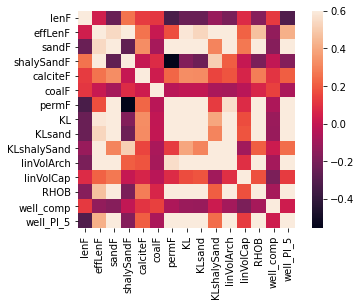

In [17]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(corrmat, vmax = 0.6, square=True)

It should be noticed that 'permF', 'KL' and 'KLsand' have a significant correlation. This correlation is so strong thus it can indicate a situation of multicollinearity.

**'well_PI_5' correlation matrix (zoomed heatmap style)**:

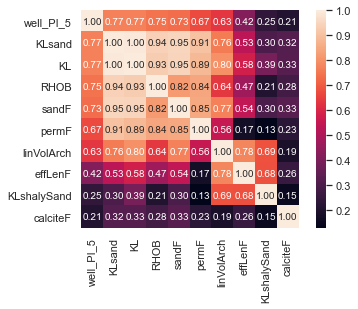

In [18]:
k = 10
cols = corrmat.nlargest(k, PI_5).index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

- KLsand, KL, RHOB, sandF are strongly correlated with 'PI_5'
- KLsand and KL probably give almost the same information. KLsand is dominated part of KL. Therefore we can use KL as a more informative variable.
- KLsand and KL are strongly correlated with RHOB and sandF however these variable pairs calculated differently.

Let's proceed tho the scatter plots.

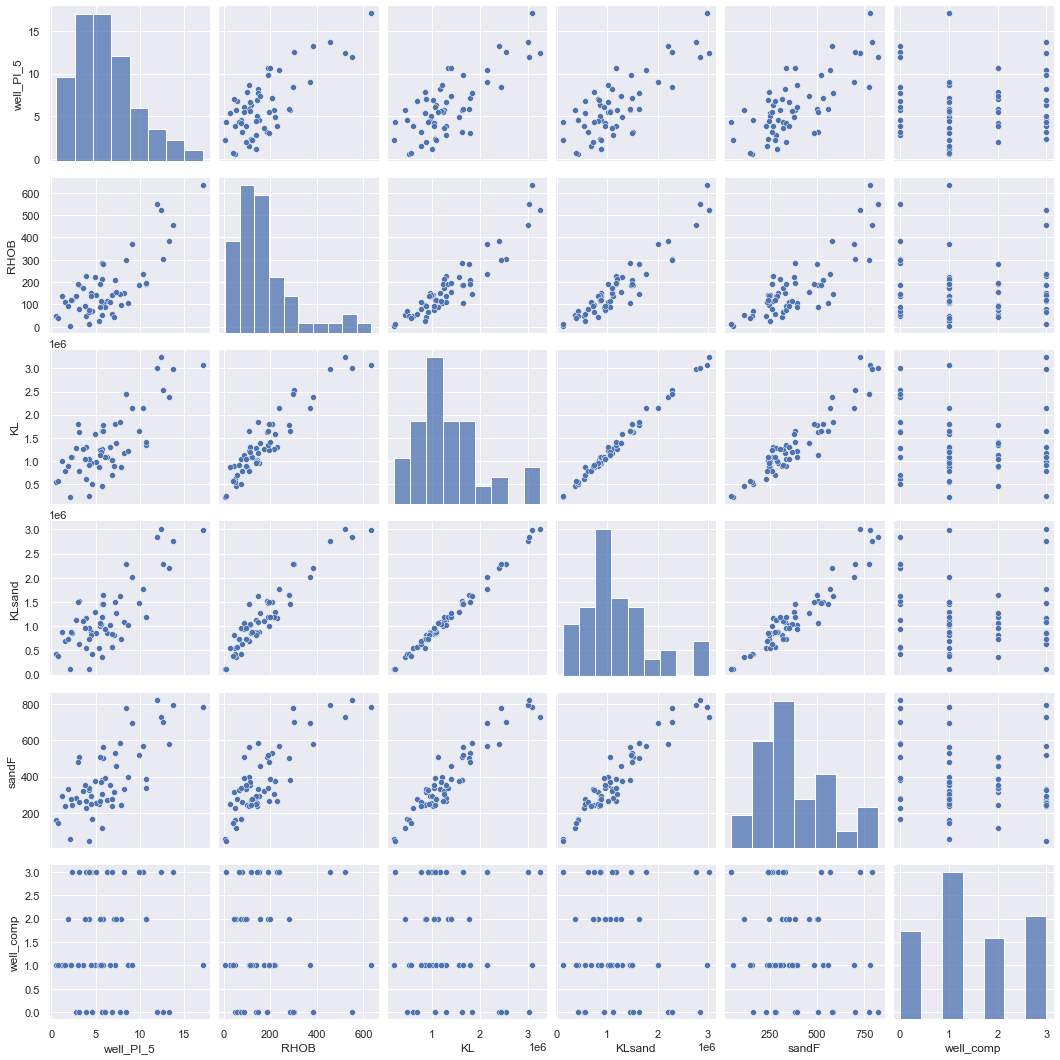

In [19]:
sns.set()
cols = [PI_5, 'RHOB', 'KL', 'KLsand', 'sandF', 'well_comp']
sns.pairplot(df[cols], size = 2.5)
plt.show();

This mega scatter plot doesn't give a piece of brand new information about the dataset. But show a pretty clear confirmation of our previous analysis.

**Missing data**:

In [20]:
df.isnull().sum()

wellName       0
lenF           0
effLenF        0
sandF          0
shalySandF     0
calciteF       0
coalF          0
permF          0
KL             0
KLsand         0
KLshalySand    0
linVolArch     0
linVolCap      0
RHOB           0
well_comp      0
well_PI_5      0
dtype: int64

Fortunately, there are no missing data so we don't need anything to deal with it.

**Univariate analysis:**

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

In [21]:
#standardizing data
PI_scaled = StandardScaler().fit_transform(df[PI_5][:,np.newaxis]);
low_range = PI_scaled[PI_scaled[:,0].argsort()][:10]
high_range= PI_scaled[PI_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.60309838]
 [-1.5596625 ]
 [-1.42697884]
 [-1.32618178]
 [-1.22274343]
 [-1.15761161]
 [-1.12660508]
 [-1.10021236]
 [-0.98577882]
 [-0.90215363]]

outer range (high) of the distribution:
[[1.04293109]
 [1.1896068 ]
 [1.26130931]
 [1.27064279]
 [1.62617644]
 [1.75640424]
 [1.81432364]
 [2.00526099]
 [2.15373366]
 [3.09489176]]


- Low range values look similar and not too far from 0.
- High range values are not so far from 0 but there is one 3.something value that can be out of range.
For now, we'll not consider any of these values as an outlier but we should be careful with this 3.something value.

**Normality analysis:**

Histogram - Kurtosis and skewness.
Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.

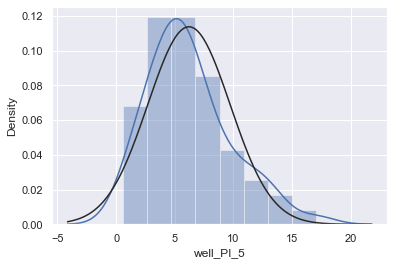

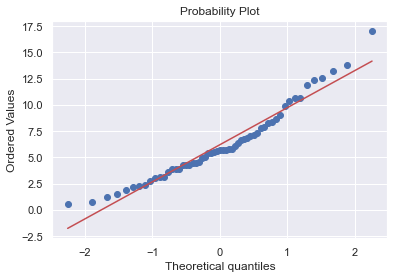

In [22]:
sns.distplot(df['well_PI_5'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['well_PI_5'], plot=plt)

As mentioned above, 'well_PI_5' is slightly not normal. It shows a small positive skewness and almost follows the diagonal line.

It's clear that log transformation is not applicable here, but i'm going to check it.

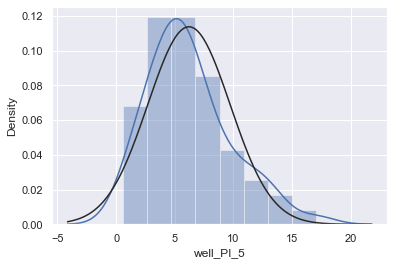

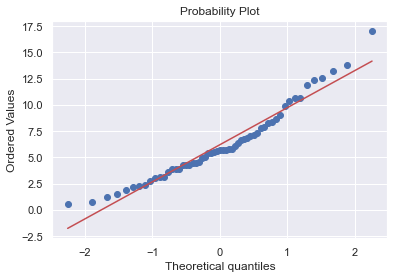

In [23]:
sns.distplot(df['well_PI_5'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['well_PI_5'], plot=plt)

In [24]:
#log transformation
log_PI_5 = np.log(df['well_PI_5'])

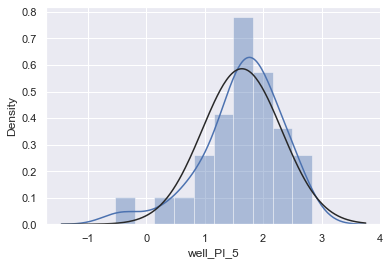

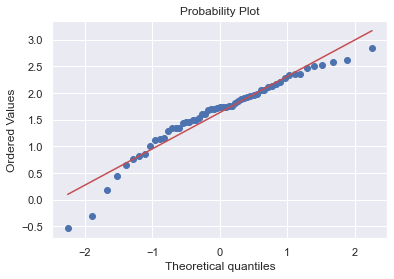

In [25]:
sns.distplot(log_PI_5, fit=norm);
fig = plt.figure()
res = stats.probplot(log_PI_5, plot=plt)

It doesn't look better so let's leave untransformed data.

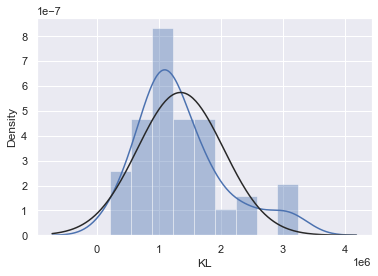

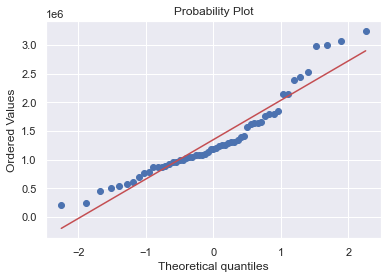

In [26]:
sns.distplot(df['KL'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['KL'], plot=plt)

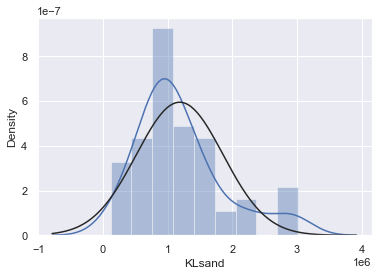

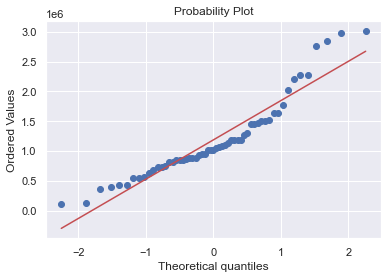

In [27]:
sns.distplot(df['KLsand'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['KLsand'], plot=plt)

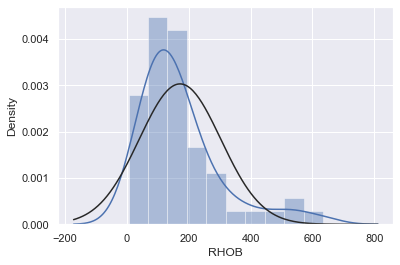

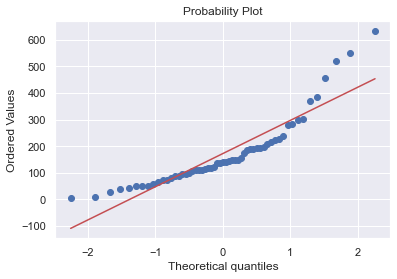

In [28]:
sns.distplot(df['RHOB'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['RHOB'], plot=plt)

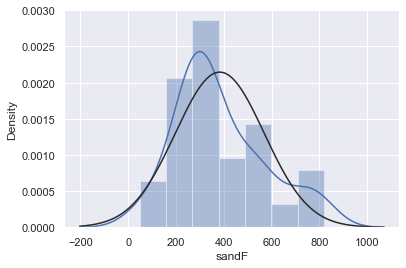

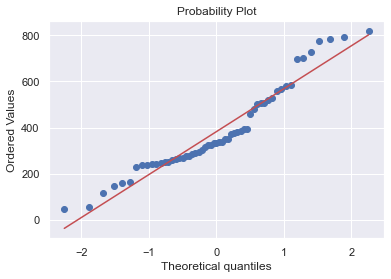

In [29]:
sns.distplot(df['sandF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['sandF'], plot=plt)

It's decided to do not to perform a log transformation for all variables. Actually, a small amount of data are available and in this analysis, we underline variables that should be inspected more carefully, and further when a number of wells will be more than one hundred, ML methods can be effectively applied.